In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
reeses = cv2.imread('reeses_puff.jpg',0)


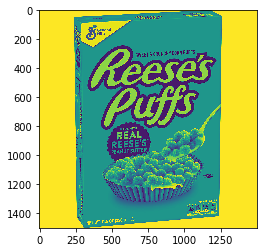

In [3]:
plt.imshow(reeses)

In [4]:
many_cereal = cv2.imread('many_cereal_puff.jpg',0)


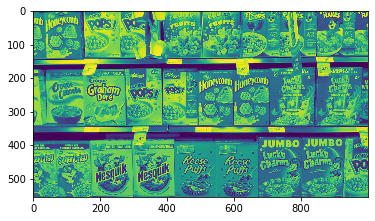

In [5]:
plt.imshow(many_cereal)

In [6]:
orb = cv2.ORB_create()

In [7]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(many_cereal,None)

In [8]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [9]:
matches = bf.match(des1,des2)

In [10]:
single_match = matches[0]

In [11]:
single_match.distance

76.0

In [12]:
len(matches)

250

In [13]:
matches = sorted(matches,key=lambda x:x.distance)

In [14]:
reeses_matches = cv2.drawMatches(reeses ,kp1,many_cereal,kp2,matches[:25],None,flags=2)

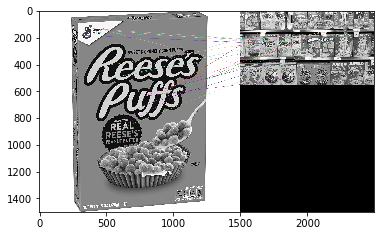

In [15]:
plt.imshow(reeses_matches)

In [16]:
sift = cv2.xfeatures2d.SIFT_create()

In [17]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(many_cereal,None)

In [18]:
bf = cv2.BFMatcher()

In [19]:
des1

array([[ 35.,  26.,  17., ...,   0.,   0.,   1.],
       [  0.,  19.,  25., ...,   0.,   0.,   8.],
       [  1.,   1.,   0., ...,   0.,   0.,   3.],
       ...,
       [  0.,   0.,  21., ...,  25.,   3.,   1.],
       [  0.,  15.,  10., ...,   0.,  87., 113.],
       [  1.,  30.,   7., ...,   0.,  19., 118.]], dtype=float32)

In [20]:
des2

array([[ 17.,  92.,  15., ...,   3.,   3., 109.],
       [  0.,   0.,  54., ...,   0.,   0.,   0.],
       [  2.,   1.,   1., ...,  40.,  24.,  26.],
       ...,
       [  5.,   3.,   3., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  41.,  79.,  72.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [21]:
matches = bf.knnMatch(des1,des2,k=2)

In [22]:
matches

[[<DMatch 000002A2B3FEDDB0>, <DMatch 000002A2B25DB290>],
 [<DMatch 000002A2B25DBCF0>, <DMatch 000002A2B25DB330>],
 [<DMatch 000002A2B25DB630>, <DMatch 000002A2B25DB530>],
 [<DMatch 000002A2B25DB390>, <DMatch 000002A2B3FF97B0>],
 [<DMatch 000002A2B3FF9850>, <DMatch 000002A2B3FF9730>],
 [<DMatch 000002A2B3FF98F0>, <DMatch 000002A2B3FF9810>],
 [<DMatch 000002A2B3FF9610>, <DMatch 000002A2B3FF9470>],
 [<DMatch 000002A2B3FF96B0>, <DMatch 000002A2B3FF92F0>],
 [<DMatch 000002A2B3FF9750>, <DMatch 000002A2B3FF92B0>],
 [<DMatch 000002A2B3FF9650>, <DMatch 000002A2B3FF95D0>],
 [<DMatch 000002A2B3FF9670>, <DMatch 000002A2B3FF95F0>],
 [<DMatch 000002A2B3FF9A50>, <DMatch 000002A2B3FF9AB0>],
 [<DMatch 000002A2B3FF9AD0>, <DMatch 000002A2B3FF9B10>],
 [<DMatch 000002A2B3FF9AF0>, <DMatch 000002A2B3FF9950>],
 [<DMatch 000002A2B3FF9A90>, <DMatch 000002A2B3FF9870>],
 [<DMatch 000002A2B3FF9A70>, <DMatch 000002A2B3FF9A10>],
 [<DMatch 000002A2B3FF99F0>, <DMatch 000002A2B3FF96D0>],
 [<DMatch 000002A2B3FF9B50>, <D

In [23]:
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [24]:
len(matches)

5749

In [25]:
len(good)

160

In [26]:
sift_matches =cv2.drawMatchesKnn(reeses ,kp1,many_cereal,kp2,matches[:25],None,flags=2)

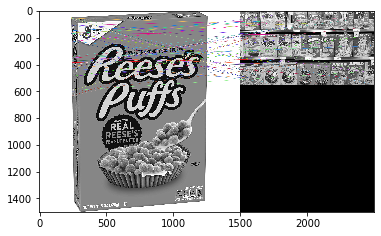

In [27]:
plt.imshow(sift_matches)

In [28]:
sift = cv2.xfeatures2d.SIFT_create()

In [29]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(many_cereal,None)

In [30]:
FLANN_INDEX_KDDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDDTREE,trees=5)
search_params = dict(checks=50)

In [31]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [32]:
raw_matches=flann.knnMatch(np.asarray(des1,np.float32),np.asarray(des2,np.float32),2)

In [33]:
matchesMask = [[0,0] for i in range(len(matches))]

In [34]:

for i,(match1,match2), in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]= [1,0]

In [40]:
draw_params =dict(matchColor=(0,0,255),
                 singlePointColor=(255,0,0),
                 matchesMask=matchesMask,
                 flags=2) 

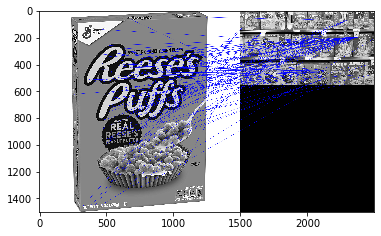

In [41]:
 flann_matches = cv2.drawMatchesKnn(reeses,kp1,many_cereal,kp2,matches,None,**draw_params)
plt.imshow( flann_matches)